# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data.

In [670]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and **drop the column with the index.**

In [671]:
#your code here

diamonds=pd.read_csv("diamonds.csv")

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [672]:
#your code here

diamonds.head()

diamonds.info()

diamonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [673]:
#your code here

diamonds.head()


"""  There is one Unnamed column, which does not tell what it referes, probabily is the ID. It has 3 columns (x,y,z) that are also not clear what are they refering to  """

'  There is one Unnamed column, which does not tell what it referes, probabily is the ID. It has 3 columns (x,y,z) that are also not clear what are they refering to  '

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [674]:
#your code here

diamonds.shape


(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's modify this column with a new scale that is more understandable for us.

**Modify `clarity` column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [675]:
#your code here

diamonds["clarity"].replace(to_replace=["J", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"],value=[0,1,2,3,4,5,6,7],inplace=True)



It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [676]:
#your code here

diamonds["color"].replace(to_replace=["D", "E", "F", "G", "H", "I", "J"],value=[6,5,4,3,2,1,0],inplace=True)

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [677]:
#your code here

print(diamonds.shape)

print(diamonds.info())


""" All values are Non-Null """

diamonds.isnull().sum()

(53940, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  int64  
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 4.5+ MB
None


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [678]:
#your code here

diamonds.dtypes

""" Probabily price should be a float instead of an integer, since price is a continuous variable. Unless all diamonds  """

' Probabily price should be a float instead of an integer, since price is a continuous variable. Unless all diamonds  '

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [679]:
#your code and comments here

diamonds.describe()

,Unnamed: 0,carat,color,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,3.405803,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.701105,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [680]:
#your code here

diamonds[(diamonds["x"]==0)|(diamonds["y"]==0)|(diamonds["z"]==0)]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,3,1,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,2,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,3,1,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,4,1,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,3,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,4,1,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,2,3,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,3,3,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,3,4,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,2,1,59.4,61.0,12631,8.49,8.45,0.0


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [681]:
#your code here

def calculate_z(row):
    return (row["x"]+row["y"])*0.5*row["depth"]

**Apply it just to the rows with incorrect values**

In [682]:
#your code here

condition=(diamonds["x"]==0.0)|(diamonds["y"]==0.0)|(diamonds["z"]==0.0)

indexs=diamonds[condition].apply(calculate_z,axis=1).index


diamonds["z"][condition]=diamonds[condition].apply(calculate_z,axis=1).values


/var/folders/wf/ysxbv8152xb5ck7nz1ply8sw0000gp/T/ipykernel_23403/454509050.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds["z"][condition]=diamonds[condition].apply(calculate_z,axis=1).values


In [683]:
diamonds["z"][condition]

2207     385.0365
2314     385.2030
4791     408.5550
5471     383.9120
10167    454.0800
11182    203.8960
11963      0.0000
13601    405.8160
15951      0.0000
24394    503.1180
24520      0.0000
26123    519.2110
26243      0.0000
27112    513.7740
27429      0.0000
27503    500.6595
27739    566.2250
49556      0.0000
49557      0.0000
51506    404.0760
Name: z, dtype: float64

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [684]:
#your code here

diamonds["z"].replace(to_replace=0.0,value=np.nan,inplace=True)

Let's check the data again with the `describe()` method.

In [685]:
#your code here

diamonds.describe()

,Unnamed: 0,carat,color,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,26970.500000,0.797940,3.405803,61.749405,57.457184,3932.799722,5.731157,5.734526,3.643648
std,15571.281097,0.474011,1.701105,1.432621,2.234491,3989.439738,1.121761,1.142135,6.850398
min,1.000000,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,1.070000
25%,13485.750000,0.400000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,566.225000


The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [686]:
#your code here

print(diamonds.isna().sum())

""" 7 Nan. Drop the lines """

ind=diamonds[diamonds["z"].isna()].index

diamonds.drop(labels=ind,axis=0,inplace=True)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             7
dtype: int64


# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [687]:
#your code here

describe=diamonds.describe()
describe

,Unnamed: 0,carat,color,depth,table,price,x,y,z
count,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000,53933.000000
mean,26970.195316,0.797884,3.405800,61.749333,57.457002,3932.155026,5.731901,5.735270,3.643648
std,15571.473740,0.473983,1.701151,1.432501,2.234052,3988.700283,1.119932,1.140339,6.850398
min,1.000000,0.200000,0.000000,43.000000,43.000000,326.000000,0.000000,3.680000,1.070000
25%,13485.000000,0.400000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26971.000000,0.700000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.000000,1.040000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,566.225000


In [688]:
diamonds["depth"].quantile(0.75)-diamonds["depth"].quantile(0.25)

1.5

In [689]:
#your comments here

def find_outlier(data_frame):

    q1=diamonds["depth"].quantile(0.25)

    q3=diamonds["depth"].quantile(0.75)

    iq=q3-q1

    condition=(diamonds["depth"]>q3+1.5*iq)|(diamonds["depth"]<q1-11.5*iq)


In [690]:
def find_outlier(data_frame):

    for element in data_frame.select_dtypes(include=["float","int"]).columns[1:]:

        q1=data_frame[element].quantile(0.25)

        q3=data_frame[element].quantile(0.75)

        iq=q3-q1

        data_frame["outlier_"+element]=(data_frame[element]>q3+1.5*iq)|(data_frame[element]<q1-11.5*iq)

    return data_frame



To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [691]:
#your code here

print(find_outlier(diamonds))

       Unnamed: 0  carat        cut  color clarity  depth  table  price     x  \
0               1   0.23      Ideal      5       1   61.5   55.0    326  3.95   
1               2   0.21    Premium      5       2   59.8   61.0    326  3.89   
2               3   0.23       Good      5       4   56.9   65.0    327  4.05   
3               4   0.29    Premium      1       3   62.4   58.0    334  4.20   
4               5   0.31       Good      0       1   63.3   58.0    335  4.34   
...           ...    ...        ...    ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal      6       2   60.8   57.0   2757  5.75   
53936       53937   0.72       Good      6       2   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good      6       2   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium      2       1   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal      6       1   62.2   55.0   2757  5.83   

          y     z  outlier_

In [692]:
#your code here

diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_carat,outlier_color,outlier_depth,outlier_table,outlier_price,outlier_x,outlier_y,outlier_z
0,1,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43,False,False,False,False,False,False,False,False
1,2,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31,False,False,False,False,False,False,False,False
2,3,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31,False,False,False,True,False,False,False,False
3,4,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63,False,False,False,False,False,False,False,False
4,5,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,6,2,60.8,57.0,2757,5.75,5.76,3.50,False,False,False,False,False,False,False,False
53936,53937,0.72,Good,6,2,63.1,55.0,2757,5.69,5.75,3.61,False,False,False,False,False,False,False,False
53937,53938,0.70,Very Good,6,2,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,False,False,False,False,False
53938,53939,0.86,Premium,2,1,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,False,False,False,False,False


Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

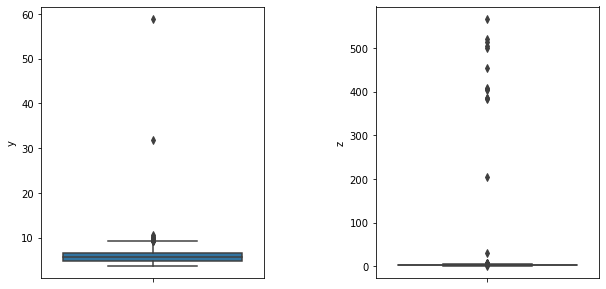

In [693]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values for z higher than 10 in it.


In [694]:
#your code here

diamonds[diamonds["z"]>10]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,outlier_carat,outlier_color,outlier_depth,outlier_table,outlier_price,outlier_x,outlier_y,outlier_z
2207,2208,1.00,Premium,3,1,59.1,59.0,3142,6.55,6.48,385.0365,False,False,False,False,False,False,False,True
2314,2315,1.01,Premium,2,I1,58.1,59.0,3167,6.66,6.60,385.2030,False,False,False,False,False,False,False,True
4791,4792,1.10,Premium,3,1,63.0,59.0,3696,6.50,6.47,408.5550,False,False,False,False,False,False,False,True
5471,5472,1.01,Premium,4,1,59.2,58.0,3837,6.50,6.47,383.9120,False,False,False,False,False,False,False,True
10167,10168,1.50,Good,3,I1,64.0,61.0,4731,7.15,7.04,454.0800,False,False,False,False,False,False,False,True
11182,11183,1.07,Ideal,4,1,61.6,56.0,4954,0.00,6.62,203.8960,False,False,False,False,False,False,False,True
13601,13602,1.15,Ideal,3,3,59.2,56.0,5564,6.88,6.83,405.8160,False,False,False,False,False,False,False,True
24394,24395,2.18,Premium,2,1,59.4,61.0,12631,8.49,8.45,503.1180,True,False,False,False,True,False,False,True
26123,26124,2.25,Premium,1,2,61.3,58.0,15397,8.52,8.42,519.2110,True,False,False,False,True,False,False,True
27112,27113,2.20,Premium,2,2,61.2,59.0,17265,8.42,8.37,513.7740,True,False,False,False,True,False,False,True


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [695]:
#your code here

diamonds.loc[diamonds["z"]>10,"z"]=0



diamonds.loc[diamonds["z"]==0.0,"z"]=diamonds.apply(calculate_z,axis=1)



Let's check if we actually corrected the outlier.

In [696]:
diamonds.loc[2207]

Unnamed: 0           2208
carat                 1.0
cut               Premium
color                   3
clarity                 1
depth                59.1
table                59.0
price                3142
x                    6.55
y                    6.48
z                385.0365
outlier_carat       False
outlier_color       False
outlier_depth       False
outlier_table       False
outlier_price       False
outlier_x           False
outlier_y           False
outlier_z            True
Name: 2207, dtype: object

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [697]:
#your code here

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [698]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows and comment what you see**

In [699]:
#your thoughts here

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

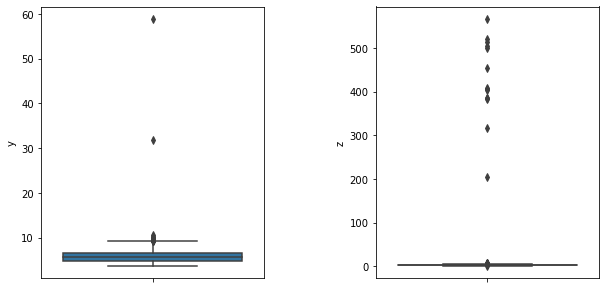

In [700]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [701]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean.csv``**

In [702]:
#your code here